# Chapter 2: End-to-End Machine Learning Project

## Popular open data repositories

- [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)
- [Kaggle datasets](https://www.kaggle.com/datasets)
- [Amazon's AWS datasets](https://registry.opendata.aws/)

##  Metal portals (list open data repositories)

- [http://dataportals.org/search](http://dataportals.org/search)
- [http://opendatamonitor.eu/](http://opendatamonitor.eu/)
- [http://quandl.com/](http://quandl.com/)

## Other pages listing many popular open data repositories

- [Wikipedia's list of Machine Learning datasets](https://goo.gl/SJHN2k)
- [Quora.com question](http://goo.gl/zDR78y)
- [Datasets subreddit](https://www.reddit.com/r/datasets)

## Look at the big picture

Xây dựng model `housing prices in California` sử dụng `California census data`. Tập data bao gồm các thông số:

- population
- median income
- median housing price

cho mỗi nhóm khối ở California. Các nhóm khối này là đơn vị địa lý nhỏ nhất cho US Census Bureau publishes sample data ( Một nhóm khối thường có 600-3000 người). Chúng ta có thể gọi nó là quận.

Model của chúng ta sẽ học từ tập dataset này để có thể dự đoán `median housing price` trong bất kỳ quận nào, với các số liệu features của quận đó cho trước.



## Frame the Problem

1. Việc đóng khung vấn đề là đầu tiên cần phải biết được chính xác business objective của vấn đề. Và công ty mong muốn sử dụng kết quả của model của chúng ta như thế nào. Điều nay rất quan trọng vì nó sẽ quyết định đến việc chọn model, chọn performance measure để đánh giá model và cần bao nhiêu effort bỏ ra để điều chỉnh model.

Trả lời: Ouput của model của chúng ta sẽ được gửi cho một machine learning system khác để tiếp tục được thực hiện.

Việc làm như trên gọi là `data pipline`

2. Câu hỏi tiếp theo cần biết đó là hiện tại thì solution là như thế nào

Trả lời: Hiện tại có một nhóm chuyên gia muốn lấy dữ liệu về housing price để tính toán tuy nhiên một số data thu được về thì không có dữ liệu này, vì vậy mà họ ước lượng giá trị này bằng một phương thức phức tạp nào đó. Việc ước lượng này tốn rất nhiều thời gian, tiền bạc và kết quả đạt được thì không được tốt cho lắm. 

Chính vì vậy mà xây dựng lên model AI để dự đoán housing price dựa trên những số liệu thu được của dataset là một phương án tốt và cần thiết

3. Sau khi đã có đủ nhưng thôn tin cần biết như trên thì ta cần phải xác định là đây là `supervised, unsupervised hay reinforcement learning`. Đây là `classification task, regression task hay gif`. Ta nên dùng batch learning hay online learning techniques.

Trả lời: Ta thấy rằng vì data cung cấp cho training là đã được đánh nhãn => Đây là học giám sát (`supervised`). Từ các số liệu mà tính toán ra housing price => Phương pháp sử dụng là `regression`. Và số lượng data là không quá lớn và cũng không có thay đổi, thêm liên tục => Sử dụng batch learning.

## Select a Performance Measure

Sử dụng RMSE

![](../../../imgs/rmse.png)

## Get The Data

### Download the Data

Download file `housing.tgz` về và sử dụng lệnh `xzf housing.tgz` để giải nén. Hoặc có thể thực hiện công đoạn trên với python

In [38]:
import os
import tarfile
import urllib
import pandas as pd

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)



In [39]:
fetch_housing_data()

housing_df = load_housing_data()

housing_df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Xem 5 bản ghi đầu tiên của datasets ta thấy mỗi dòng là số liệu của 1 quận. Có tổng cộng 10 features cho mỗi bản ghi( dòng) đó là

In [40]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Ta thấy răng các cột đều có dữ liệu khác `null` trừ một cột là cột `total_bedrooms` có 20433/20640 dữ liệu là `non-null` tức là có 207 quận bị missing value cho features này.

Lại thấy răng tất cả các features đều thuộc kiểu dữ liệu là `numericsl` trừ features `ocean_proximity` là có kiểu dữ liệu là `object`, tuy nhiên khi nhìn qua bảng datasets ta thấy rằng giá trị hiển thị là text => Đây là kiểu biến `Enum` hay cũng có thể gọi là kiểu categorical. Để xem features này có các biến categorical nào hiển thị ta có thể dùng method `.value_counts()`

In [41]:
housing_df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Sử dụng method `.describe()` để xem summary các dữ liệu thuộc kiểu `numerical` của bảng datasets

In [42]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Với:

- `mean`: Giá trị trung bình của cột dữ liệu (features)
- `std`: Standard Deviation (Độ lệch chuẩn) là giá trị mô tả phân phối của các giá trị.
    * Giá trị `std` nhỏ nghĩa là phần lớn các giá trị gần với giá trị trung bình (`mean`).
    * Giá trị `std` lớn nghĩa là các giá trị trải rộng trên phạm vi rộng hơn

    ![](../../../imgs/std.png)

    Trong đó:
    - $\mu$ là `mean`
    - `N` là tổng số các giá trị xét
    - `x` là các giá trị xét

Các giá trị `25-50-75%` tương ứng với các features chỉ ra bao nhiêu phần trăm số liệu nhỏ hơn giá trị hienr thị ở các cột.

Ví dụ với cột `housing_median_age`:

- 25% số quận có giá trị `housing_median_age` nhỏ hơn 18
- 50% số quận có giá trị `housing_median_age` nhỏ hơn 29
- 75% số quận có trị trị `housing_median_age` nhỏ hơn 37

Để có cái nhìn trực quan hơn về dữ liệu thì ta sẽ vẽ histogram. Sử dụng method `.hist()` của dataframe và dùng `matplotlib` để vẽ.

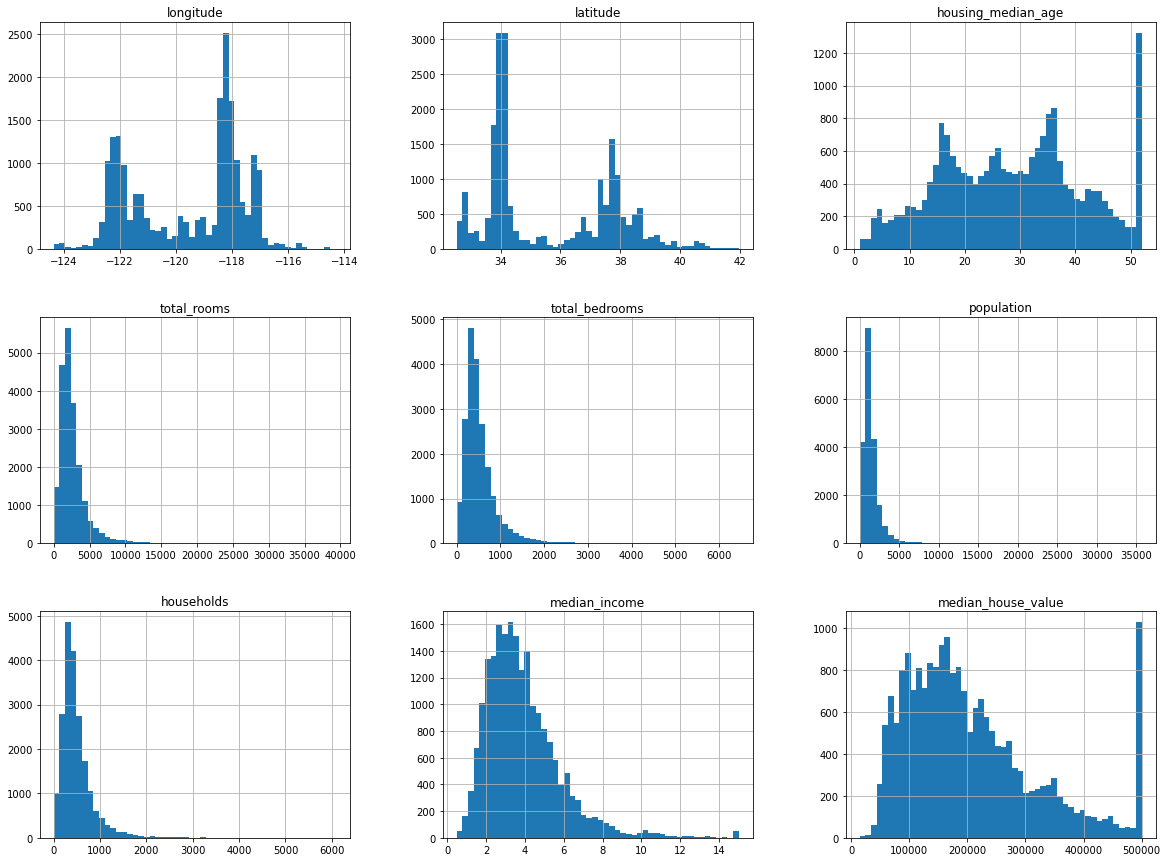

In [43]:
import matplotlib
import matplotlib.pyplot as plt
#Only in a jupyter notebook
%matplotlib inline 

housing_df.hist(bins=50, figsize=(20, 15))
plt.show()



**Note:** Sử dụng `%matplotlib inline` là để display hình ảnh ngay trong jupyter notebook

Nguyên văn: 

The hist() method relies on Matplotlib, which in turn relies on a
user-specified graphical backend to draw on your screen. So before
you can plot anything, you need to specify which backend Matplot‐
lib should use. The simplest option is to use Jupyter’s magic com‐
mand %matplotlib inline. This tells Jupyter to set up Matplotlib
so it uses Jupyter’s own backend. Plots are then rendered within the
notebook itself. Note that calling show() is optional in a Jupyter
notebook, as Jupyter will automatically display plots when a cell is
executed.


**Note về histogram trên:**

1. Thứ nhất, Đối với feature `median_income` đã được chia tỉ lệ và giới hạn với mức 15 cho các giá trị lớn hơn mức trung bình và 0.5 với giá trị nhỏ hơn mức trung bình.

2. The housing median age and the median house value were also capped. The later may be a serious problem since it is your target attribute (your labels). Your Machine Learning algorithms may learn that prices never go beyond that limit. You need to check with your client team (the team that will use your system’s output) to see if this is a problem or not. If they tell you that they need precise predictions even beyond $500,000, then you have mainly two options:
    - Collect proper labels for the districts whose labels were capped.
    - Remove those districts from the training set (and also from the test set, since your system should not be evaluated poorly if it predicts values beyond $500,000).

3. Ta thấy răng data thu được đang có xu hướng giá trị tập trung về phía bên trái hơn là bên phải

### Create Test set

In [44]:
import numpy as np

# To make unchange when shuffle
np.random.seed(2910)

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [45]:
train_set, test_set = split_train_test(housing_df, 0.2)

print(f"{len(train_set)} train + {len(test_set)} test")

16512 train + 4128 test


Hoặc dùng hàm `train_test_split` của `sklearn`

In [46]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_df, test_size=0.2, random_state=2910)

print(f"{len(train_set)} train + {len(test_set)} test")

16512 train + 4128 test


Việc chia tập data như trên là ngẫu nhiên, tức là ta không quan tâm gì khác ngoài số lượng dữ liệu phân chia ra. Cách chia này sẽ ok nếu như tập dataset đủ lớn ( đặc biệt là liên quan đến số lượng các attributes). 

Nhưng nếu như tập datasets của ta không đủ lớn thì việc chia ngẫu nhiên như trên có thể gây thiếu hụt các đại diện của dữ liệu trong 2 tập train/test.
Ví dụ khi một cty thực hiện cuộc khảo sát cho 1000 người thì họ không chỉ có lấy 1000 người đó một cách chỉ quan tâm đến số lượng người, mà họ sẽ còn quan tâm đến 1000 người này có thể đại diện cho toàn bộ dân số hay không. Giả sử như toàn bộ dân số có tỉ lệ nam là 51.3%, nữ là 48.7% => tất nhiên là ta muốn 1000 người chọn ra để phỏng vấn sẽ có thể có tỉ lệ như thế => 513 nam và 487 nữ. Việc chọn dữ liệu như này được gọi là `stratified sampling`. 

<AxesSubplot:>

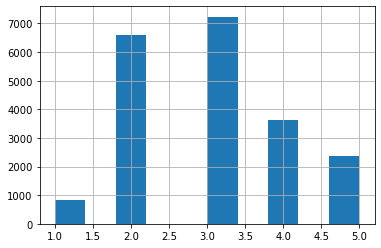

In [47]:
housing_df['income_cat'] = np.ceil(housing_df['median_income']/1.5)

housing_df['income_cat'].where(housing_df['income_cat'] < 5, 5.0, inplace=True)

housing_df['income_cat'].hist()

Stratified sampling với hàm `StratifiedShuffleSplit` của sklearn

In [48]:
from random import random
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=2910)

for train_index, test_index in split.split(housing_df, housing_df['income_cat']):
    strat_train_set = housing_df.loc[train_index]
    strat_test_set = housing_df.loc[test_index]
    
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: income_cat, dtype: float64

Drop `income_cat` features

In [49]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)
    
    

## Discover and visualize the Data to Gain Insights

**Visualizing Geographical Data**

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

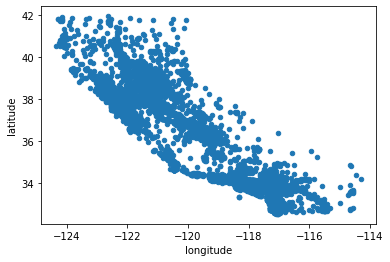

In [50]:
housing_df = strat_train_set.copy()
housing_df.plot(kind='scatter', x='longitude', y='latitude')

Nhìn hình trên so sánh với bản đồ thực tế ta sẽ thấy đây là bang `California` của Mỹ. Để thấy rõ hơn sự phân bố của datapoints thì ta sẽ set thêm aplha cho điểm dữ liệu để thấy rõ chỗ nào data point phân bố dày đặc.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

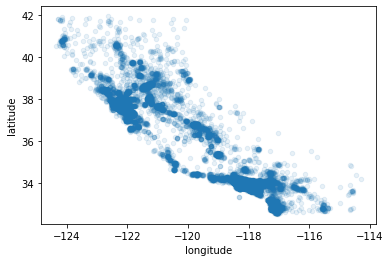

In [51]:
housing_df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

Để thấy trực quan hơn thì ta sẽ thay đổi kích thước của các điểm data point để biểu thị `population` và dùng màu để biểu thị cho giá trị `median_house_value`.

Ta sử dụng bằng parameters như sau:

- `s`: chọn là `population` (size)
- `c`: color chọn là `median_house_value` để có màu được color map range từ xanh( giá trị nhỏ) đến đỏ (giá trị lớn)

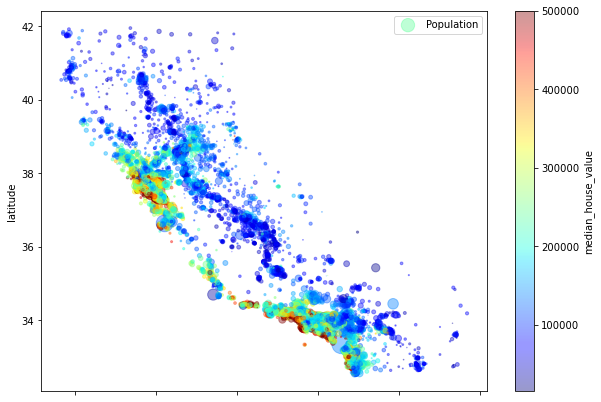

In [52]:


housing_df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
                s=housing_df['population']/100,label='Population', figsize=(10, 7),
                c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

plt.legend()

Qua ảnh trên ta thấy rằng `housing prices` có liên quan rất nhiều đến vị trí và mật độ dân số.

**Looking for Correlations**

Vì tập dataset không quá lớn nên ta có thể dễ dàng tính toán hệ số tương quan (`standard correlation coefficient`) giữa các cặp attributes sử dụng hàm `corr()`

In [53]:
corr_matrix = housing_df.corr()


Bây giờ ta sẽ tính xem các features khác của dataset có tương quan thế nào với feature `median_house_value`

In [54]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.685495
total_rooms           0.135981
housing_median_age    0.103925
households            0.068846
total_bedrooms        0.053343
population           -0.022134
longitude            -0.041966
latitude             -0.145487
Name: median_house_value, dtype: float64

Hệ số tương quan có range -1 đến 1.

Ta mong muốn trị tuyệt đối của hệ số này gần 1 nhất tức là giá trị càng gần -1 hoặc 1 thì tốt nhất

Khi hệ số này gần 1 nó có nghĩa là 2 giá trị xét tương quan có tương quan lớn với nhau và có mỗi quan hệ đồng biến. Ví dụ đối với `median_income` và `median_housing_value` có tương quan lớn và mối quan hệ đồng biến thì khi `median_income` tăng lên thì đồng nghĩa với việc `median_housing_value` cũng tăng lên.

Khi hệ số gần -1, có nghĩa là 2 giá trị xét tương quan có tương quan lớn với nhau và có mối quan hệ nghịch biến. Tính chât sẽ ngược lại so với đồng biến.

Như vậy các giá trị có trị tuyệt đối gần 0 nghĩa là gần như chả có quan hệ gì với nhau => KHông tốt.
Ta có thể tham khảo một số hình dạng của `standard correlation coeficient`

![](../../../imgs/corr.png)

Một cách khác để xem sự tương quan giữa các features một cách trực quan hơn đó là vẽ các điểm lên bằng `scatter_matrix` của `pandas`, sử dụng cho các features có giá trị số.

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

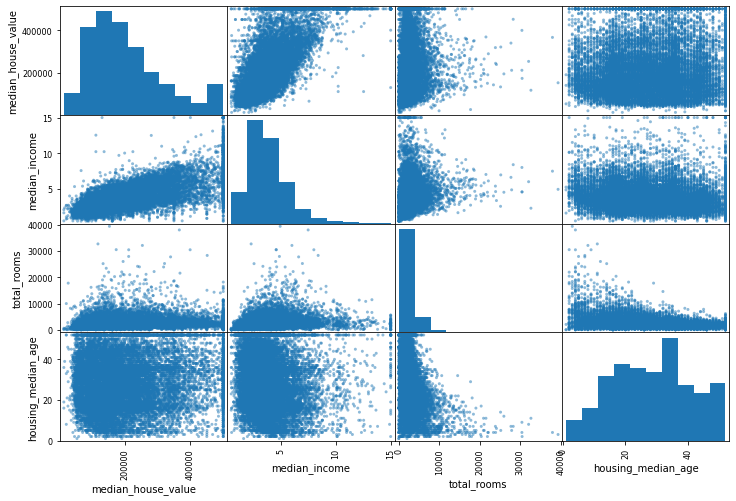

In [55]:
from pandas.plotting import scatter_matrix
features = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

scatter_matrix(housing_df[features], figsize=(12, 8))

Để nhìn rõ hơn ta xét 2 ví dụ với 2 cặp sau:

`median_house_value` và `median_income` có mqh đồng biến:

Ta thấy rằng giá trị `median_income` càng tăng thì giá trị `median_house_value` cũng có xu hướng tăng theo

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

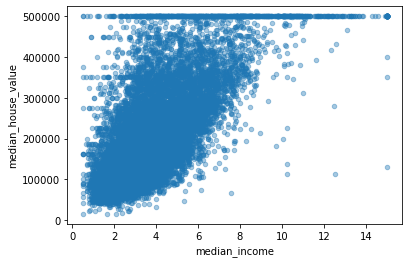

In [56]:
housing_df.plot(kind='scatter',x='median_income', y='median_house_value', alpha=0.4)

`median_house_value` và `population`

Đây là cặp giá trị nghịch biến nên ta có thể thấy khi population tăng thì giá nhà lại có xu hướng giảm đi


<AxesSubplot:xlabel='population', ylabel='median_house_value'>

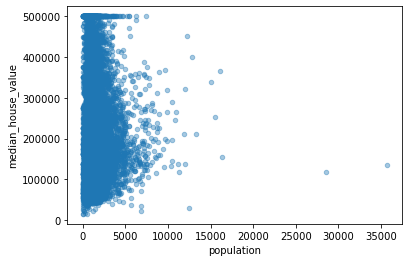

In [57]:
housing_df.plot(kind='scatter',x='population', y='median_house_value', alpha=0.4)

Một điều nữa có thể làm cho data của chúng ta ok hơn cho training đó là bằng cách nào đó kết hợp các features lại cho ra một features mới sao cho features mới có tương quan hơn với features hay output đầu ra. Việc này còn giúp giảm thiếu features đi nữa.

Ví dụ trong bài toán đang xét, ta thấy rằng total number of rooms trong 1 quận không useful lắm nếu như ta không biết có bao nhiêu hộ gia đình trong một quận => Ta muốn có là giá trị trung bình số phòng / hộ gia đình. Tương tự đối với số phòng tắm => số phòng tắm/phòng. Và cuối cùng là số người / hộ gia đình.

In [58]:
housing_df['rooms_per_household'] = housing_df['total_rooms']/housing_df['households']
housing_df['bedrooms_per_room'] = housing_df['total_bedrooms']/housing_df['total_rooms']
housing_df['population_per_house_hold'] = housing_df['population']/housing_df['households']


In [59]:
corr_matrix = housing_df.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.685495
rooms_per_household          0.148948
total_rooms                  0.135981
housing_median_age           0.103925
households                   0.068846
total_bedrooms               0.053343
population_per_house_hold   -0.020216
population                  -0.022134
longitude                   -0.041966
latitude                    -0.145487
bedrooms_per_room           -0.254564
Name: median_house_value, dtype: float64

Ta thấy răng các giá trị kết hợp mới đã tốt hơn là 2 giá trị `rooms_per_household` và `bedrooms_per_room`.

## Prepare the Data for Machine Learning Algorithms

### Separate predictors and labels

In [60]:
housing_df = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

### Data Cleaning

In [62]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 3988 to 2434
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16356 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


Ta thấy `total_bedrooms` có thiếu một số khá lớn các giá trị.

Thông thường ta sẽ có các options để xử lý missing value như trên đó là:

1. Bỏ các bản ghi bị missing value tại cột `total_bedrooms`
2. Bỏ cột `total_bedrooms`
3. Fill các missing value tại cột `total_bedrooms` bằng một giá trị nào đó: median, mode, ... (median là giá trị trung bình của tất cả các giá trị hiện có trong cột, mode là giá trị có tần suất xuất hiện nhiều nhất trong cột)

Thường thì ta hay sử dụng option 3 với giá trị fill là median

In [ ]:
# option1
# housing_df.dropna(subset=['total_bedrooms'])

# option2
# housing_df.drop('total_bedrooms', axis=1)

# option3
median = housing_df['total_bedrooms'].median()
housing_df['total_bedrooms'].fillna(median, inplace=True)


Sử dụng `SimpleImputer` của sklearn để thực hiện tính toán giá trị để fill vào missing value

In [72]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

housing_num = housing_df.drop('ocean_proximity', axis=1)

imputer.fit(housing_num)
print(imputer.statistics_)
print(housing_num.median().values)

housing_num.info()


[-118.49     34.26     29.     2124.      435.     1166.      410.
    3.5391]
[-118.49     34.26     29.     2124.      435.     1166.      410.
    3.5391]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 3988 to 2434
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16356 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


Sử dụng `.transform()` method để thực hiện replace các missing value bằng các giá trị median đã tính ở trên. Việc thực hiện transform sẽ biến đổi dataframe thành numpy array

In [76]:
X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, columns = housing_num.columns)

housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


### Handling Text and Categorical Attributes

In [77]:
housing_cat = housing_df['ocean_proximity']
housing_cat.head(10)

3988      <1H OCEAN
11860        INLAND
14982     <1H OCEAN
16736      NEAR BAY
15354     <1H OCEAN
17277    NEAR OCEAN
551        NEAR BAY
20601        INLAND
15644      NEAR BAY
12847        INLAND
Name: ocean_proximity, dtype: object

Sử dụng `factorize()` để chuyển categorical value thành number encode

In [80]:
housing_cat_encoded, housing_categories = housing_cat.factorize()

print(housing_cat_encoded[:10])

print(housing_categories)

[0 1 0 2 0 3 2 1 2 1]
Index(['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN', 'ISLAND'], dtype='object')


Thực hiện one-hot encoder

In [83]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
print(housing_cat_1hot)

# Convert to numpy array
housing_cat_1hot.toarray()

  (0, 0)	1.0
  (1, 1)	1.0
  (2, 0)	1.0
  (3, 2)	1.0
  (4, 0)	1.0
  (5, 3)	1.0
  (6, 2)	1.0
  (7, 1)	1.0
  (8, 2)	1.0
  (9, 1)	1.0
  (10, 0)	1.0
  (11, 0)	1.0
  (12, 1)	1.0
  (13, 0)	1.0
  (14, 2)	1.0
  (15, 0)	1.0
  (16, 1)	1.0
  (17, 0)	1.0
  (18, 1)	1.0
  (19, 1)	1.0
  (20, 0)	1.0
  (21, 3)	1.0
  (22, 3)	1.0
  (23, 0)	1.0
  (24, 1)	1.0
  :	:
  (16487, 1)	1.0
  (16488, 3)	1.0
  (16489, 0)	1.0
  (16490, 0)	1.0
  (16491, 0)	1.0
  (16492, 1)	1.0
  (16493, 0)	1.0
  (16494, 0)	1.0
  (16495, 1)	1.0
  (16496, 0)	1.0
  (16497, 1)	1.0
  (16498, 0)	1.0
  (16499, 1)	1.0
  (16500, 2)	1.0
  (16501, 3)	1.0
  (16502, 0)	1.0
  (16503, 0)	1.0
  (16504, 3)	1.0
  (16505, 0)	1.0
  (16506, 1)	1.0
  (16507, 1)	1.0
  (16508, 1)	1.0
  (16509, 1)	1.0
  (16510, 0)	1.0
  (16511, 1)	1.0


array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

### Custom transformers

In [91]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, x, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X [:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
            
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing_df.values)

### Feature Scaling

Thường thì có 2 cách để thực hiện feature scaling để thực hiện scale sao cho tất cả features có cùng scale: `min-max scaling` và `standardization`

- Min-max scaling: Thực hiện phép toán x = (x-min)/max

- Standardization: Thực hiện phép toán x = (x-min)/variance

### Transformation Pipelines